<a href="https://colab.research.google.com/github/GalinaZh/Appl_alg2021/blob/main/Applied_Alg_sem_6_Interpolation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Занятие 6  OK
# Прикладная алгебра и численные методы
## Интерполяция: оценка близости функций

In [40]:
!python -m pip install sympy --upgrade
!python -m pip install -U matplotlib
!pip install bezier

Requirement already up-to-date: sympy in /usr/local/lib/python3.6/dist-packages (1.7.1)
Requirement already up-to-date: matplotlib in /usr/local/lib/python3.6/dist-packages (3.3.4)
     |████████████████████████████████| 1.4MB 4.4MB/s 


In [41]:
import numpy as np
import scipy.linalg
import sympy
import bezier
from sympy import S, interpolating_spline
from sympy.polys.specialpolys import interpolating_poly
import matplotlib.pyplot as plt
from copy import deepcopy
from scipy.interpolate import lagrange, interp1d, splrep, splev, InterpolatedUnivariateSpline, BPoly, CubicSpline
from scipy.linalg import norm
import pandas as pd
from google.colab import files
%matplotlib inline

In [42]:
import sympy
import numpy
sympy.__version__, numpy.__version__

('1.7.1', '1.19.0')

In [43]:
sympy.init_printing(use_unicode=False, wrap_line=False, no_global=True)

https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.norm.html#scipy.linalg.norm

https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html


## Многочлен Лагранжа
$$
f(x) = L(x) = \sum_{i=1}^n y_i 
\frac{(x - x_0)(x - x_1)...(x - x_{i-1})(x - x_{i+1})...(x - x_n)}{(x_i - x_0)(x_i - x_1)...(x_i - x_{i-1})(x_i - x_{i+1})...(x_i - x_n)}, 
\quad y_i = f(x_i), \quad i = 0, ..., n.
$$
## Пример 1
Построим полином Лагранжа для данных 

https://showdata.gks.ru/report/278934/

файл 6_population.xlsx

Из файла считать данные общего прироста населения РФ в 2013-2019 гг., построить полином Лагранжа в помощью scipy.interpolate

Построить график полученного полинома, отметить соответствующие данные точками.

Для чтения из файла будем пользоваться read_excel

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html

Для загрузки файла с компьютера используем средства colab:


  from google.colab import files

  for fn in uploaded.keys():

    print('User uploaded file "{name}" with length {length} bytes'.format(
          name=fn, length=len(uploaded[fn])))

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Saving 6_population.xlsx to 6_population.xlsx
User uploaded file "6_population.xlsx" with length 18683 bytes


После успешной загрузки файла считаем из него данные. 

Выведем на экран основные атрибуты полученных данных:

In [ ]:
rexcel = pd.read_excel('6_population.xlsx', index_col=0, skiprows=[0, 1], dtype={'Name': str, 'Value': int})
display('index', rexcel[:10].index, 'columns', rexcel[:10].columns, 'values', rexcel[:10].values, 'axes', rexcel[:10].axes, 
        'ndim', rexcel.ndim, 'size', rexcel.size, 'shape', rexcel.shape, 'empty', rexcel.empty)

'index'

Index(['Российская Федерация', 'Центральный федеральный округ',
       'Белгородская область', 'Сибирский федеральный округ',
       'Дальневосточный федеральный округ', 'Брянская область',
       'Владимирская область', 'Воронежская область', 'Ивановская область',
       'Калужская область'],
      dtype='object', name='все население')

'columns'

Index(['w2:p_mest:11', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'],
      dtype='object')

'values'

array([[ 6.43000e+02,  3.19872e+05,  3.05469e+05,  2.77422e+05,
         2.59662e+05,  7.60600e+04, -9.97120e+04, -3.21300e+04],
       [ 3.00000e+01,  1.40961e+05,  1.31605e+05,  1.52840e+05,
         1.05263e+05,  1.01831e+05,  6.66460e+04,  5.54970e+04],
       [ 1.40000e+10,  3.12300e+03,  3.82800e+03,  2.20100e+03,
         2.72800e+03, -2.98900e+03, -2.45800e+03,  1.73300e+03],
       [ 4.10000e+01,          nan,          nan,          nan,
                 nan,          nan, -5.68220e+04, -5.49480e+04],
       [ 4.20000e+01,          nan,          nan,          nan,
                 nan,          nan, -3.39780e+04, -1.94200e+04],
       [ 1.50000e+10, -1.10670e+04, -9.65900e+03, -7.19900e+03,
        -5.21100e+03, -9.54800e+03, -1.07950e+04, -7.69600e+03],
       [ 1.70000e+10, -8.42100e+03, -7.70800e+03, -8.44500e+03,
        -7.56900e+03, -1.12620e+04, -1.25320e+04, -7.38900e+03],
       [ 2.00000e+10, -1.41800e+03,  2.18800e+03,  2.33000e+03,
         1.93100e+03, -1.64000e+0

'axes'

[Index(['Российская Федерация', 'Центральный федеральный округ',
        'Белгородская область', 'Сибирский федеральный округ',
        'Дальневосточный федеральный округ', 'Брянская область',
        'Владимирская область', 'Воронежская область', 'Ивановская область',
        'Калужская область'],
       dtype='object', name='все население'),
 Index(['w2:p_mest:11', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
        'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'],
       dtype='object')]

'ndim'

'size'

800

'shape'

'empty'

False

Выделим данные о приросте численности населения РФ с 2013 по 2019:

array([319872., 305469., 277422., 259662.,  76060., -99712., -32130.])

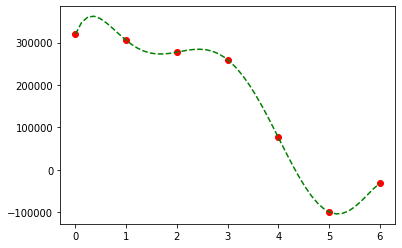

In [ ]:
Y1 = rexcel.values[0,1:]
display(Y1)
X1 = [k for k in range(len(Y1))]
poly1 = lagrange(X1, Y1)
X1ls = np.linspace(X1[0], X1[-1])
plt.plot(X1, Y1, 'ro', X1ls, poly1(X1ls), 'g--')

## Пример 2.
Построим кубический сплайн для данных из Примера 1.

Построим на одном графике сплайн и полином Лагранжа Примера 1, отметим на нем  точки данных. 

Вычислим значения сплайна и полинома Лагранжа в серединах отрезков между соседними точками данных (т.е. в 0.5, 1.5, 2.5 и т.п.), найдем нормы разности полученных векторов.

1276.9545 6.0 82110.3759 45403.7111 41349.2484 40281.3388 4523.0336


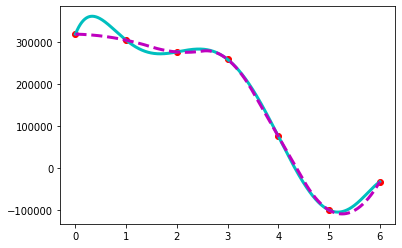

In [27]:
spl2_cubic = interp1d(X1, Y1, kind='quadratic')
xs = np.linspace(X1[0], X1[-1], 1000)
plt.plot(X1, Y1, 'ro', xs, poly1(xs), 'c-', xs, spl2_cubic(xs), 'm--', lw=3)
X2 = np.arange(0.5, 6.1, 1)
difference2 = poly1(X2) - spl2_cubic(X2)
print(*[round(norm(difference2, item), 4) for item in list(range(-1, 4)) +[np.inf, -np.inf]])

In [ ]:
npsympyLagrange = sympy.lambdify(x, sympyLagrange(x))

## Пример 3

Вычислим интеграл от квадрата разности кубического сплайна и полинома Лагранжа, воспользуемся sympy.

In [33]:
x = sympy.Symbol('x')
spline3 = interpolating_spline(3, x, list(X1), list(Y1))
sympyLagrange = interpolating_poly(len(X1), x, X1, Y1)

difference3 = (sympyLagrange - spline3)**2
sympy.integrate(difference3, (x, 0, 6))

Для того, чтобы выражениями sympy воспользоваться для построения графика matplotlib, воспользуемся инструментом lambdify, возвращающим функцию, в которую можно в качестве аргумента подставлять, например, np.linspace.

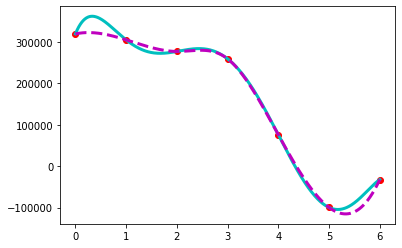

In [34]:
npsympyLagrange = sympy.lambdify(x, sympyLagrange)

npsympyspline3 = sympy.lambdify(x, spline3)
xs = np.linspace(X1[0], X1[-1], 1000)
plt.plot(X1, Y1, 'ro', xs, npsympyLagrange(xs), 'c-', xs, npsympyspline3(xs), 'm--', lw=3)

## Кривые Безье

https://bezier.readthedocs.io/en/stable/python/reference/bezier.curve.html

## Пример 4
Построим кривую Безье с помощью модуля bezier:

https://bezier.readthedocs.io/en/stable/python/reference/bezier.curve.html

Кривая должна аппроксимировать $f(x) = \sin(x/3)$, проходя через точки $\pi/2$ и $3\pi/2$, при этом в этих точках касательная кривой Безье должна совпадать с касательной $f(x)$.

Построим на общем графике $f(x)$ и кривую Безье, отметим узловые точки.

Вначале определим функцию $f4(x)$, затем составим список точек $x_1, x_2, x_3, x_4$ для построения кривой Безье. Концы $x_1, x_4$ берем из условия, это $\pi/2$ и $3\pi/2$, $\pi$ берем из sympy. Промежуточные точки $x_2, x_3$ определим из условия на производные: прямая, соединяющая первую точку со второй должна быть касательной к $f(x)$, так что горизонтальную координату второй точки для кривой Безье возьмем на 1 больше, чем у первой, $x_2 = x_1 + 1$, тогда вертикальная координата второй точки $y_2 = y_1 + f'(x_1)$. Аналогично $x_3 = x_4 - 1$, $y_3 = y_4 - f'(x_4)$.


In [44]:
x = sympy.Symbol('x')
def f4(x):  
  return sympy.sin(x/3)

X4 = [sympy.pi/2, sympy.pi/2 + 1, 3*sympy.pi/2 - 1, 3*sympy.pi/2]  

Нужно вычислить производную $f(x)$ в произвольной точке и в точках $x_1, x_4$. 

In [46]:
df4 = f4(x).diff(x)
Y4 = [f4(X4[0]), f4(X4[0]) + df4.subs(x, X4[0]), f4(X4[-1]) - df4.subs(x, X4[-1]), f4(X4[-1])]
nodes = np.asfarray([X4, Y4])
curve4 = bezier.Curve(nodes, degree=3)

Теперь осталось построить график. Для того, чтобы кривая Безье попала на один график с f4, нужно передать методу plot класса кривых Безье параметр ax, отвечающий за систему координат.

<AxesSubplot:>

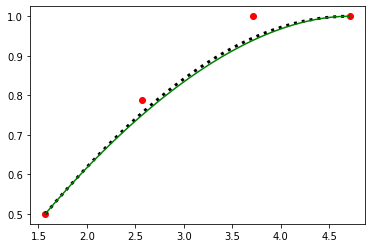

In [56]:
X4plt = np.linspace(float(X4[0]), float(X4[-1]), 1000)
npf4 = sympy.lambdify(x, f4(x))
fig, ax = plt.subplots()
ax.plot(X4, Y4, 'ro', X4plt, npf4(X4plt), 'k:', lw=3)
curve4.plot(100, color='green', ax=ax)

## Пример 5

Для кривой Безье Примера 4 вычислим интеграл квадрата разности с  $f(x) = \sin(x/3)$, от $\pi/2$ до $3\pi/2$, а также нормы разности значений вертикальной координаты кривой Безье и $f(x)$ на сетке с шагом 0.1.

Для вычисления коррдинат точек на кривой Безье воспользуемся методом implicitize класса кривых Безье и sympy.solve.

In [ ]:
curve4_y = sympy.solve(curve4.implicitize(), sympy.Symbol('y'))[0]
print(round(sympy.integrate((f4(x) - curve4_y)**2, (x, np.pi/2, 3*np.pi/2)), 3))

curve4_y_np = sympy.lambdify(x, curve4_y)
X5 = np.arange(np.pi/2, 3*np.pi/2, 0.1)
difference5 = npf4(X5) - curve4_y_np(X5)
print(*[round(norm(difference5, item), 4) for item in list(range(-1, 4)) +[np.inf, -np.inf]])